In [22]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import poisson
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels as st
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from tabulate import tabulate
import pmdarima as pm
from dateutil.relativedelta import relativedelta
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

In [23]:
df = pd.read_csv('Datos_preprocesados_accidentes_y_victimas_accidentes.csv')

In [24]:
db_provincia34 = df[df['COD_PROVINCIA'] == 34]

In [25]:
num_victimas_dia_semana34 = db_provincia34.groupby(['ANYO', 'MES', 'DIA_SEMANA', 'HORA'])['TOTAL_VICTIMAS_24H'].sum()

In [26]:
num_victimas_dia_semana34

ANYO  MES  DIA_SEMANA  HORA
2016  1    1           12      1
                       15      1
           2           8       1
                       12      1
           3           8       2
                              ..
2020  12   3           22      2
           4           12      1
                       20      1
           6           22      1
           7           9       2
Name: TOTAL_VICTIMAS_24H, Length: 890, dtype: int64

In [27]:
num_accidentes_por_dia_semana34 = db_provincia34.groupby(['ANYO', 'MES'])['DIA_SEMANA'].value_counts()

In [28]:
num_accidentes_por_dia_semana34

ANYO  MES  DIA_SEMANA
2016  1    4             3
           1             2
           2             2
           3             2
           5             2
                        ..
2020  12   3             2
           4             2
           1             1
           6             1
           7             1
Name: count, Length: 364, dtype: int64

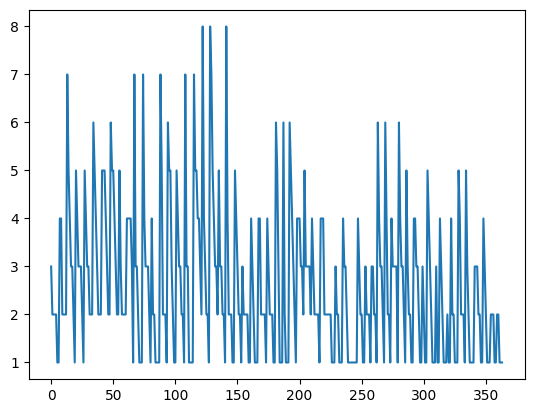

In [29]:
plt.plot(num_accidentes_por_dia_semana34.values)

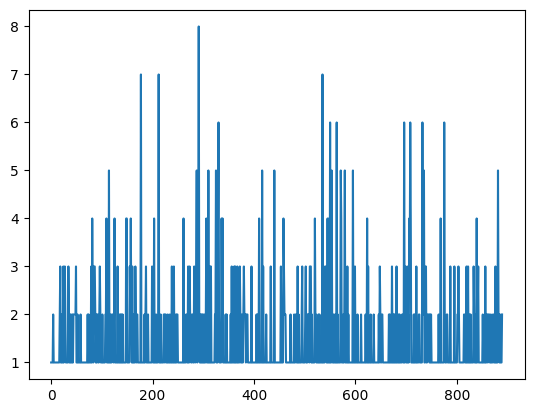

In [30]:
plt.plot(num_victimas_dia_semana34.values)

In [31]:
num_accidentes_por_dia_semana34 = num_accidentes_por_dia_semana34.reset_index()

In [32]:
num_accidentes_por_dia_semana34['FECHA'] = num_accidentes_por_dia_semana34.apply(lambda row: str(row['ANYO']) + '/' + str(row['MES']) + '/' + str(row['DIA_SEMANA']), axis = 1)

In [33]:
num_accidentes_por_dia_semana34

,ANYO,MES,DIA_SEMANA,count,FECHA
0,2016,1,4,3,2016/1/4
1,2016,1,1,2,2016/1/1
2,2016,1,2,2,2016/1/2
3,2016,1,3,2,2016/1/3
4,2016,1,5,2,2016/1/5
...,...,...,...,...,...
359,2020,12,3,2,2020/12/3
360,2020,12,4,2,2020/12/4
361,2020,12,1,1,2020/12/1
362,2020,12,6,1,2020/12/6


In [34]:
num_victimas_dia_semana34 = num_victimas_dia_semana34.reset_index()

In [35]:
num_victimas_dia_semana34

,ANYO,MES,DIA_SEMANA,HORA,TOTAL_VICTIMAS_24H
0,2016,1,1,12,1
1,2016,1,1,15,1
2,2016,1,2,8,1
3,2016,1,2,12,1
4,2016,1,3,8,2
...,...,...,...,...,...
885,2020,12,3,22,2
886,2020,12,4,12,1
887,2020,12,4,20,1
888,2020,12,6,22,1


In [36]:
num_victimas_dia_semana34['FECHA'] = num_victimas_dia_semana34.apply(lambda row: str(row['ANYO']) + '/' + str(row['MES']) + '/' + str(row['DIA_SEMANA']), axis = 1)

In [37]:
num_victimas_dia_semana34

,ANYO,MES,DIA_SEMANA,HORA,TOTAL_VICTIMAS_24H,FECHA
0,2016,1,1,12,1,2016/1/1
1,2016,1,1,15,1,2016/1/1
2,2016,1,2,8,1,2016/1/2
3,2016,1,2,12,1,2016/1/2
4,2016,1,3,8,2,2016/1/3
...,...,...,...,...,...,...
885,2020,12,3,22,2,2020/12/3
886,2020,12,4,12,1,2020/12/4
887,2020,12,4,20,1,2020/12/4
888,2020,12,6,22,1,2020/12/6


In [38]:
num_accidentes_por_dia_semana34

,ANYO,MES,DIA_SEMANA,count,FECHA
0,2016,1,4,3,2016/1/4
1,2016,1,1,2,2016/1/1
2,2016,1,2,2,2016/1/2
3,2016,1,3,2,2016/1/3
4,2016,1,5,2,2016/1/5
...,...,...,...,...,...
359,2020,12,3,2,2020/12/3
360,2020,12,4,2,2020/12/4
361,2020,12,1,1,2020/12/1
362,2020,12,6,1,2020/12/6


In [39]:
num_victimas_dia_semana34

,ANYO,MES,DIA_SEMANA,HORA,TOTAL_VICTIMAS_24H,FECHA
0,2016,1,1,12,1,2016/1/1
1,2016,1,1,15,1,2016/1/1
2,2016,1,2,8,1,2016/1/2
3,2016,1,2,12,1,2016/1/2
4,2016,1,3,8,2,2016/1/3
...,...,...,...,...,...,...
885,2020,12,3,22,2,2020/12/3
886,2020,12,4,12,1,2020/12/4
887,2020,12,4,20,1,2020/12/4
888,2020,12,6,22,1,2020/12/6


In [40]:
df_provincia34 = num_accidentes_por_dia_semana34.merge(num_victimas_dia_semana34, on = 'FECHA')

In [41]:
df_provincia34 = df_provincia34[['ANYO_x', 'FECHA', 'count', 'TOTAL_VICTIMAS_24H']]

In [42]:
df_provincia34.describe()

,ANYO_x,count,TOTAL_VICTIMAS_24H
count,890.000000,890.000000,890.000000
mean,2017.648315,3.462921,1.549438
std,1.365212,1.738622,1.009697
min,2016.000000,1.000000,1.000000
25%,2016.000000,2.000000,1.000000
50%,2017.000000,3.000000,1.000000
75%,2019.000000,5.000000,2.000000
max,2020.000000,8.000000,8.000000


### MODELO PROPHET

In [43]:
df_provincia34['y'] = df_provincia34['count']
df_provincia34['ds'] = pd.to_datetime(pd.to_datetime(df_provincia34['FECHA']).dt.date)

17:59:05 - cmdstanpy - INFO - Chain [1] start processing
17:59:05 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


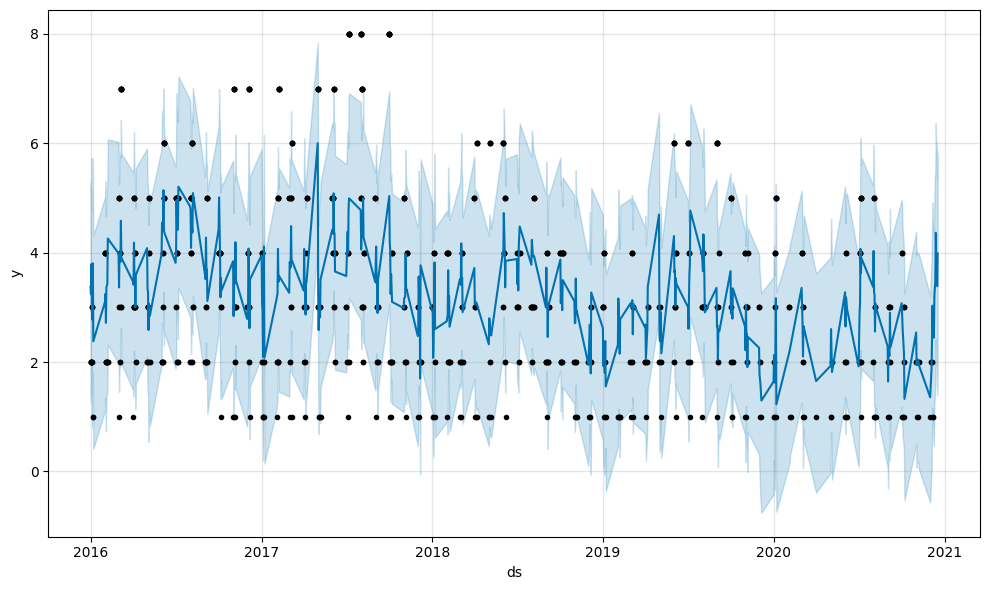

In [44]:
ts = df_provincia34[['ds', 'y']]
model = Prophet(
   yearly_seasonality=True,
   seasonality_mode=['additive','multiplicative'][0]
   ).add_country_holidays(country_name='ESP'
   ).fit(ts)

future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)
fig1 = model.plot(forecast)

c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing

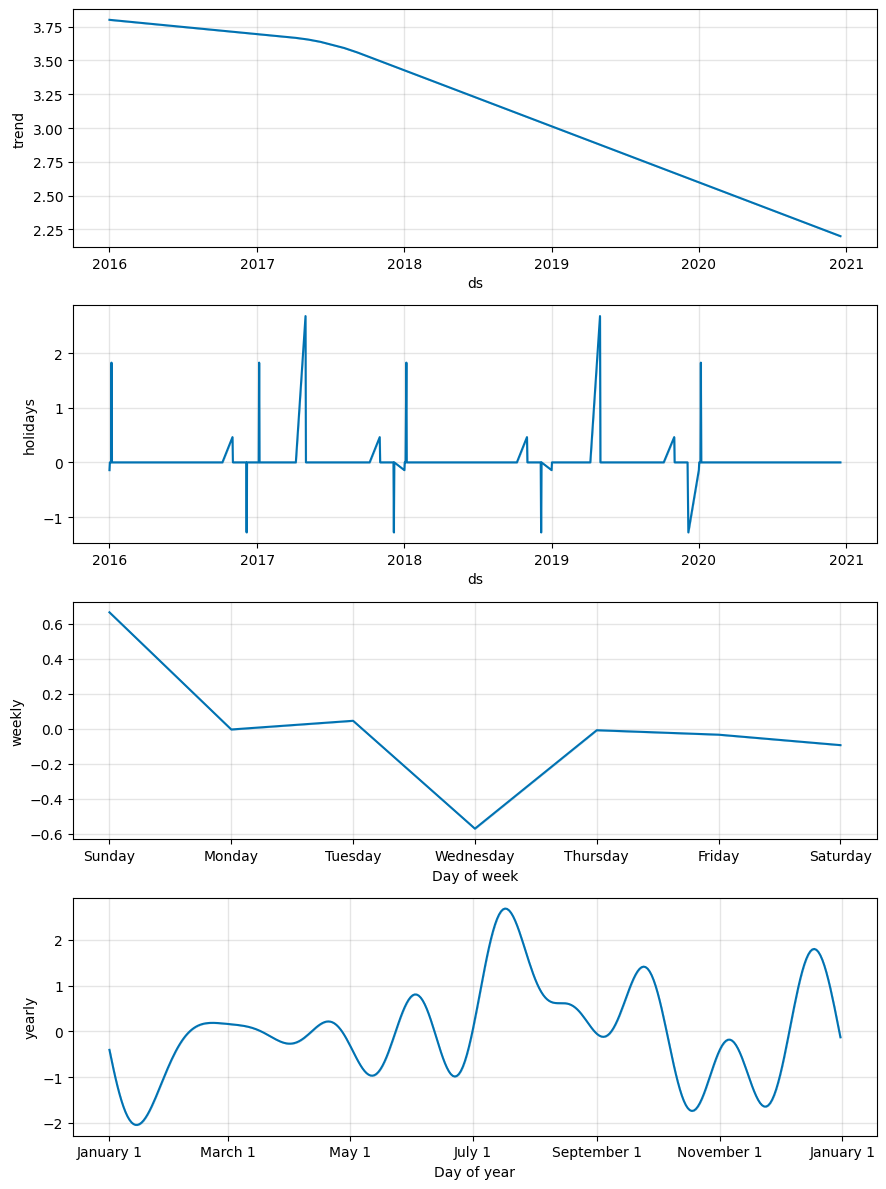

In [45]:
fig2 = model.plot_components(forecast)

### MODELO REDES NEURONALES

In [46]:
PASOS=336
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = df_provincia34['count'].values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-336),var1(t-335),var1(t-334),var1(t-333),var1(t-332),var1(t-331),var1(t-330),var1(t-329),var1(t-328),var1(t-327),...,var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
336,-0.428571,-0.428571,-0.428571,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,...,0.142857,0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857
337,-0.428571,-0.428571,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,...,0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.428571
338,-0.428571,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-1.000000,...,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.428571,-0.428571
339,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-1.000000,-1.000000,...,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.428571,-0.428571,-0.428571
340,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-0.714286,-1.000000,-1.000000,-0.142857,...,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.142857,-0.428571,-0.428571,-0.428571,-0.714286


In [47]:
values = reframed.values
n_train_days = 390
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split isnto input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(390, 1, 336) (390,) (164, 1, 336) (164,)


In [48]:
len(values)

554

In [49]:
def crear_modeloFF():
    model = Sequential()
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [50]:
EPOCHS=40

model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1, 336)         │       113,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 336)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           337 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,569 (443.63 KB)

 Trainable params: 113,569 (443.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 0.5894 - mse: 0.5166 - val_loss: 0.5029 - val_mse: 0.4082
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4840 - mse: 0.3762 - val_loss: 0.4714 - val_mse: 0.3576
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3907 - mse: 0.2494 - val_loss: 0.3965 - val_mse: 0.2482
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.4185 - mse: 0.2863 - val_loss: 0.3993 - val_mse: 0.2558
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3809 - mse: 0.2529 - val_loss: 0.4338 - val_mse: 0.3110
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3523 - mse: 0.2150 - val_loss: 0.4430 - val_mse: 0.3268
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.3481 - mse: 0.2078 - val_loss: 0.4118 - val_mse: 0.2910
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3321 - mse: 0.1957 - val_loss: 0.4098 - val_mse: 0.2736
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.3427 - mse: 0.1990 -

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


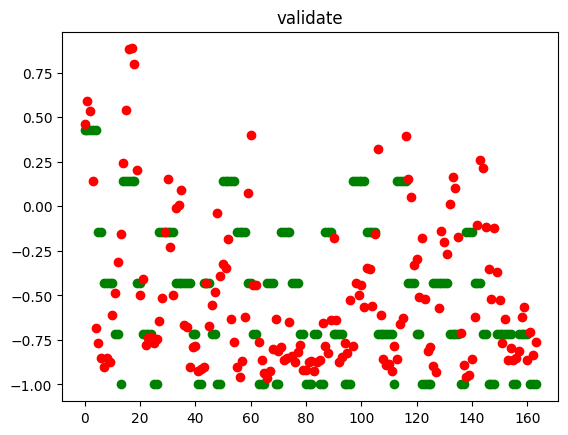

In [51]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

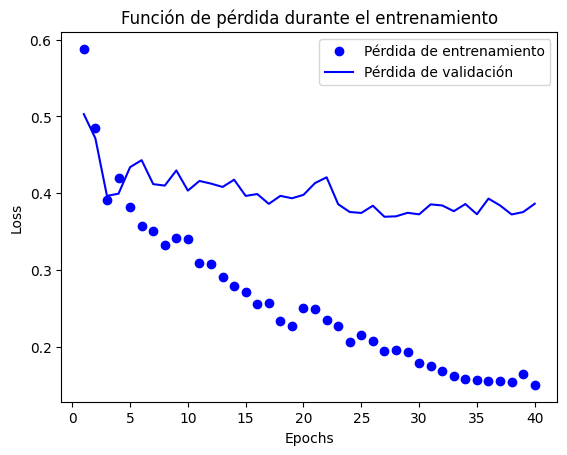

In [52]:
loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar la función de pérdida durante el entrenamiento
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
plt.title('Función de pérdida durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
resultados_viajes = scaler.inverse_transform(results)
resultados_viajes

array([[6.107231 ],
       [6.5605164],
       [6.368198 ],
       [5.000796 ],
       [2.101017 ],
       [1.8069791],
       [1.5242503],
       [1.3470105],
       [1.5254397],
       [1.448727 ],
       [2.3699586],
       [2.7981515],
       [3.4059334],
       [3.9612713],
       [5.345548 ],
       [6.38447  ],
       [7.5993857],
       [7.6006036],
       [7.2860527],
       [5.2072306],
       [2.7665682],
       [3.0790956],
       [1.7776549],
       [1.9040732],
       [1.9272875],
       [1.8216795],
       [1.896909 ],
       [2.2392244],
       [2.694036 ],
       [3.9924142],
       [5.0397954],
       [3.7098198],
       [2.763234 ],
       [4.45902  ],
       [4.517744 ],
       [4.826537 ],
       [2.1644354],
       [2.1247284],
       [1.346726 ],
       [1.7273391],
       [1.7581426],
       [1.256059 ],
       [1.298153 ],
       [1.345096 ],
       [2.991713 ],
       [2.1527822],
       [2.5621321],
       [2.8094099],
       [4.3769813],
       [3.1223292],
